In [1]:
import numpy as np
import as_seg.autosimilarity_computation as as_comp
import as_seg.barwise_input as bi

import barwisemusiccompression.scripts.default_path as paths
import barwisemusiccompression.scripts.overall_scripts as scr
import barwisemusiccompression.ae as ae
import barwisemusiccompression.ae_utils as ae_utils
from barwisemusiccompression.model.current_plot import *


import warnings

In [5]:
feature = "nn_log_mel_grill"

subdivision = 96
hop_length = 32
hop_length_seconds = hop_length/44100

#song_name = "The Beatles - Come Together"
#spectrogram, bars, references_segments = scr.load_spec_annot_cometogether(feature, hop_length)
song_name = 1
spectrogram, bars, references_segments = scr.load_spec_annot_song_RWC(song_name, feature, hop_length)

freq_len = spectrogram.shape[0]
tensor_spectrogram = bi.tensorize_barwise_BFT(spectrogram, bars, hop_length_seconds, subdivision)

batch_size = None

# FC

Using cpu
Epoch: 1 	Cumulated reconstruction loss: 57.624859
Epoch: 2 	Cumulated reconstruction loss: 601.218628
Epoch: 3 	Cumulated reconstruction loss: 125.188492
Epoch: 4 	Cumulated reconstruction loss: 97.486496
Epoch: 5 	Cumulated reconstruction loss: 71.479286
Epoch: 6 	Cumulated reconstruction loss: 48.945889
Epoch: 7 	Cumulated reconstruction loss: 38.098564
Epoch: 8 	Cumulated reconstruction loss: 30.206987
Epoch: 9 	Cumulated reconstruction loss: 26.299280
Epoch: 10 	Cumulated reconstruction loss: 24.789776


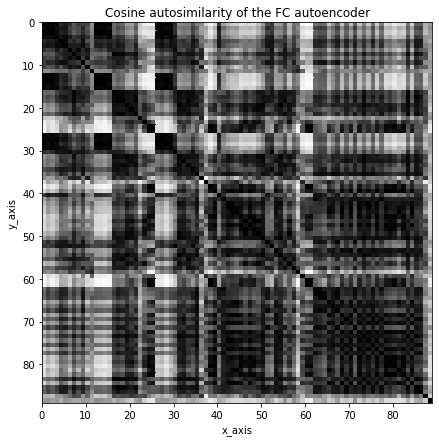

In [3]:
flatten_dataloader = ae_utils.generate_flatten_dataloader(tensor_spectrogram, batch_size = batch_size)
fc = ae.FullyConnectedAutoencoder(input_size_x = subdivision, input_size_y = freq_len, dim_latent_space = 16, beta = 2, latent_nonlinearity = None, seed = seed)
fc.my_optim_method(n_epochs = n_epochs, data_loader = flatten_dataloader, lr = 1e-3, early_stop_patience = 100, verbose = True, labels = None)

proj_fc = fc.get_latent_projection(flatten_dataloader)
cosine_fc = as_comp.get_cosine_autosimilarity(proj_fc)
plot_me_this_spectrogram(cosine_fc, title = "Cosine autosimilarity of the FC autoencoder")

# Conv

Using cpu
Epoch: 1 	Cumulated reconstruction loss: 358.920410
Epoch: 2 	Cumulated reconstruction loss: 1554.996460
Epoch: 3 	Cumulated reconstruction loss: 229.048615
Epoch: 4 	Cumulated reconstruction loss: 249.189606
Epoch: 5 	Cumulated reconstruction loss: 681.817322
Epoch: 6 	Cumulated reconstruction loss: 592.076721
Epoch: 7 	Cumulated reconstruction loss: 246.751709
Epoch: 8 	Cumulated reconstruction loss: 62.680462
Epoch: 9 	Cumulated reconstruction loss: 95.411736
Epoch: 10 	Cumulated reconstruction loss: 235.675934


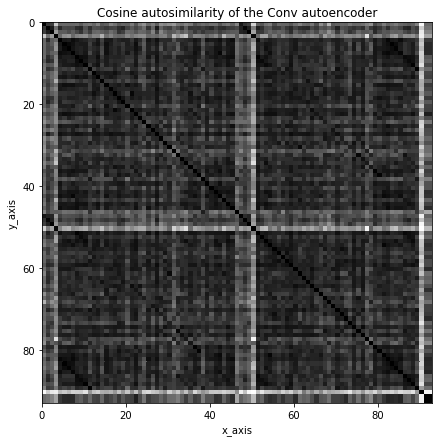

235.67593383789062


In [6]:
conv_dataloader = ae_utils.generate_dataloader(tensor_spectrogram, batch_size = batch_size)
conv = ae.ConvolutionalAutoencoder(input_size_x = subdivision, input_size_y = freq_len, dim_latent_space = 16, beta = 2, latent_nonlinearity = None, seed = seed)
_, losses = conv.my_optim_method(n_epochs = n_epochs, data_loader = conv_dataloader, lr = 1e-3, early_stop_patience = 100, verbose = True, labels = None)

proj_conv = conv.get_latent_projection(conv_dataloader)
cosine_conv = as_comp.get_cosine_autosimilarity(proj_conv)
plot_me_this_spectrogram(cosine_conv, title = "Cosine autosimilarity of the Conv autoencoder")
print(losses[-1])